In [1]:
import pandas as pd
import numpy as np

np.set_printoptions(precision=3, suppress=True)


import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

In [2]:
train_dataset = pd.read_csv("./Data/A_Z Handwritten Data.csv")
num_train_dataset = train_dataset.shape[0]

In [3]:
print(f"Number of training data: {num_train_dataset}")
train_dataset.head()

Number of training data: 372450


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_dataset.rename(columns={'0':'label'}, inplace=True)

In [5]:
train_dataset = train_dataset.sample(n=5000, random_state=42).sort_values(by='label').reset_index(drop=True)

In [6]:
train_dataset['label'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [7]:
train_dataset

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_y = train_dataset['label'].astype('float32')
train_x = train_dataset.drop(['label'],axis = 1).astype('int32')
train_x.shape, train_y.shape

((5000, 784), (5000,))

In [9]:
encode = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

hiển thị ảnh đầu tiên

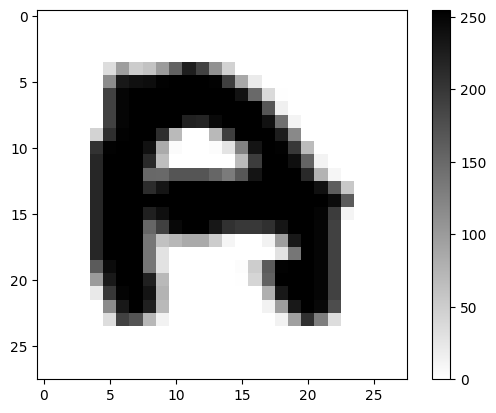

In [10]:
image = train_x.loc[0]
image = image.to_numpy().reshape(28, 28)

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

hiển thị 25 ảnh đầu

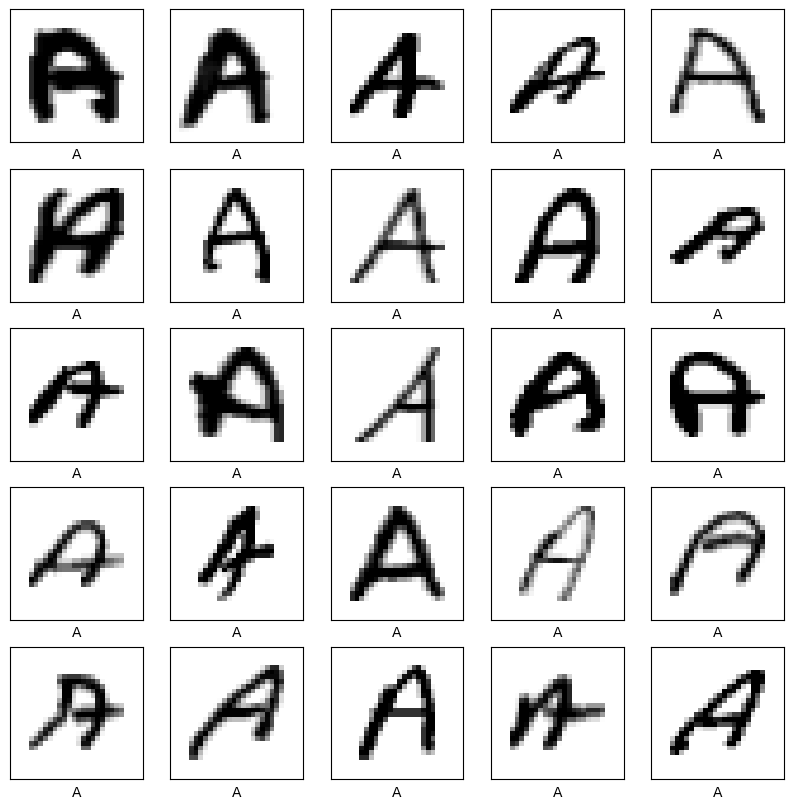

In [11]:
# change the range to see more!
plt.figure(figsize=(10,10))
for i in range(25):
    image = train_x.loc[i].to_numpy().reshape(28, 28)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(encode[int(train_y[i])])
plt.show()

tham số model

In [12]:
TEST_SIZE = 0.2 

BATCH_SIZE = 50
IMG_SHAPE  = 28 
EPOCHS     = 10

chuẩn bị dữ liệu

In [13]:
print(type(train_x))

<class 'pandas.core.frame.DataFrame'>


In [14]:
train_x,val_x,train_y,val_y = train_test_split(train_x,train_y,test_size=TEST_SIZE)
val_x,test_x,val_y,test_y = train_test_split(val_x,val_y,test_size=TEST_SIZE)

In [15]:
train_x = train_x.values.reshape(-1,28,28,1)
train_x = train_x / 255.0

val_x = val_x.values.reshape(-1,28,28,1)
val_x = val_x / 255.0

test_x = test_x.values.reshape(-1,28,28,1)
test_x = test_x / 255.0

train_x.shape, val_x.shape, test_x.shape

((4000, 28, 28, 1), (800, 28, 28, 1), (200, 28, 28, 1))

one-hot encoding

In [16]:
train_y = tf.keras.utils.to_categorical(train_y,26)
val_y = tf.keras.utils.to_categorical(val_y,26)
test_y = tf.keras.utils.to_categorical(test_y,26)

train_y.shape, val_y.shape, test_y.shape

((4000, 26), (800, 26), (200, 26))

In [17]:
print(train_y[0:5,:])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0.]]


# Data augmentation

thêm dữ liệu cho train

In [18]:
train_x.shape

(4000, 28, 28, 1)

In [19]:
type(train_x)

numpy.ndarray

In [20]:
image_gen_train = ImageDataGenerator(
        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 30)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # not randomly flip images
        vertical_flip=False)  # not randomly flip images

image_gen_train.fit(train_x)

In [21]:
train_data_gen=image_gen_train.flow(train_x,train_y, batch_size=BATCH_SIZE)

In [22]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

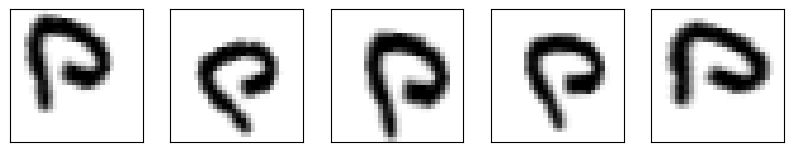

In [23]:
# change the range to see more!
plt.figure(figsize=(10,10))
for i in range(5):
    image = augmented_images[i].reshape(28, 28) 
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
plt.show()

thêm dữ liệu cho validation

In [24]:
image_gen_val = ImageDataGenerator(
        horizontal_flip=False,  # not randomly flip images
        vertical_flip=False)  # not randomly flip images

image_gen_train.fit(val_x)

In [25]:
val_data_gen=image_gen_val.flow(val_x,val_y, batch_size=BATCH_SIZE)

# model

model basic

In [26]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(26, activation="softmax")
])

model1.summary()

c:\Users\HELLO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 696,026 (2.66 MB)

 Trainable params: 696,026 (2.66 MB)

 Non-trainable params: 0 (0.00 B)

model thêm một lớp Convolutional và MaxPooling

In [27]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(26, activation="softmax")
])
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

model Thêm Dropout để giảm overfitting

In [28]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(26, activation="softmax")
])

model3.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

model thêm các lớp Convolutional và MaxPooling

In [29]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(26, activation="softmax")
])

model4.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 359,034 (1.37 MB)

 Trainable params: 359,034 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

model thêm BatchNormalization để cải thiện hội tụ, giảm dropout để giảm mất mát

In [30]:
model5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(26, activation="softmax")
])

model5.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 359,674 (1.37 MB)

 Trainable params: 359,354 (1.37 MB)

 Non-trainable params: 320 (1.25 KB)

In [31]:
#Defining the callback function to stop our training once the acceptable accuracy is reached
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            global EPOCHS_COUNT
            EPOCHS_COUNT = epoch + 1
            if(logs.get('accuracy') > 0.999):
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True

callbacks = myCallback()

compile model

In [32]:
#Compiling and model training with batch size = 50, epochs = 20, and optimizer = adam
Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005, 
            beta_1=0.9, 
            beta_2=0.999, 
            epsilon=1e-07,
            name='Adam'
)
model1.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
EPOCHS_COUNT = 0
history1 = model1.fit(train_data_gen, 
                    validation_data = val_data_gen,
                    epochs = EPOCHS, 
                    callbacks=[callbacks])

Epoch 1/10


c:\Users\HELLO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.2309 - loss: 2.7500 - val_accuracy: 0.5838 - val_loss: 1.5064
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.4580 - loss: 1.9317 - val_accuracy: 0.6850 - val_loss: 1.0894
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.5558 - loss: 1.5842 - val_accuracy: 0.7462 - val_loss: 0.8904
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6035 - loss: 1.4171 - val_accuracy: 0.8000 - val_loss: 0.7230
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6373 - loss: 1.2770 - val_accuracy: 0.8175 - val_loss: 0.6298
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6732 - loss: 1.1379 - val_accuracy: 0.8450 - val_loss: 0.5712
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7058 - loss: 1.0239 - val_accuracy: 0.8637 - val_loss: 0.5010
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7211 - loss: 0.9775 - val_accuracy: 0.8875 - val_loss: 0.

In [34]:
Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005, 
            beta_1=0.9, 
            beta_2=0.999, 
            epsilon=1e-07,
            name='Adam'
)
model2.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
EPOCHS_COUNT = 0
history2 = model2.fit(train_data_gen, 
                    validation_data = val_data_gen,
                    epochs = EPOCHS, 
                    callbacks=[callbacks])

Epoch 1/10


80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.2014 - loss: 2.8148 - val_accuracy: 0.5675 - val_loss: 1.5198
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.4836 - loss: 1.8284 - val_accuracy: 0.7100 - val_loss: 0.9532
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6086 - loss: 1.3665 - val_accuracy: 0.8275 - val_loss: 0.6178
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6885 - loss: 1.1156 - val_accuracy: 0.8650 - val_loss: 0.4835
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7306 - loss: 0.9295 - val_accuracy: 0.8938 - val_loss: 0.4133
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7446 - loss: 0.8867 - val_accuracy: 0.9000 - val_loss: 0.3641
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7898 - loss: 0.7474 - val_accuracy: 0.9300 - val_loss: 0.2972
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.7819 - loss: 0.7291 - val_accuracy: 0.9325 - val_loss: 0.

In [36]:
Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005, 
            beta_1=0.9, 
            beta_2=0.999, 
            epsilon=1e-07,
            name='Adam'
)
model3.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
EPOCHS_COUNT = 0
history3 = model3.fit(train_data_gen, 
                    validation_data = val_data_gen,
                    epochs = EPOCHS, 
                    callbacks=[callbacks])

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.1870 - loss: 2.9153 - val_accuracy: 0.4938 - val_loss: 1.8201
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.4328 - loss: 2.0535 - val_accuracy: 0.6587 - val_loss: 1.1329
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5511 - loss: 1.5762 - val_accuracy: 0.7450 - val_loss: 0.7824
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.6118 - loss: 1.3574 - val_accuracy: 0.8338 - val_loss: 0.5691
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6552 - loss: 1.1819 - val_accuracy: 0.8725 - val_loss: 0.4521
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6977 - loss: 1.0269 - val_accuracy: 0.8925 - val_loss: 0.3729
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7052 - loss: 0.9460 - val_accuracy: 0.9100 - val_loss: 0.3268
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7491 - loss: 0.8326 - val_accuracy: 0.9175 - v

In [38]:
Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005, 
            beta_1=0.9, 
            beta_2=0.999, 
            epsilon=1e-07,
            name='Adam'
)
model4.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
EPOCHS_COUNT = 0
history4 = model4.fit(train_data_gen, 
                    validation_data = val_data_gen,
                    epochs = EPOCHS, 
                    callbacks=[callbacks])

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - accuracy: 0.1486 - loss: 2.9941 - val_accuracy: 0.4762 - val_loss: 1.9515
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.4372 - loss: 2.0303 - val_accuracy: 0.7100 - val_loss: 0.8743
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.6177 - loss: 1.2591 - val_accuracy: 0.8213 - val_loss: 0.5874
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.7025 - loss: 0.9671 - val_accuracy: 0.8888 - val_loss: 0.3984
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.7670 - loss: 0.7681 - val_accuracy: 0.9200 - val_loss: 0.2743
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.8018 - loss: 0.6544 - val_accuracy: 0.9225 - val_loss: 0.2491
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.8421 - loss: 0.5258 - val_accuracy: 0.9513 - val_loss: 0.1970
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.8430 - loss: 0.5203 - val_accuracy: 0.9438 

In [40]:
Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005, 
            beta_1=0.9, 
            beta_2=0.999, 
            epsilon=1e-07,
            name='Adam'
)
model5.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
EPOCHS_COUNT = 0
history5 = model5.fit(train_data_gen, 
                    validation_data = val_data_gen,
                    epochs = EPOCHS, 
                    callbacks=[callbacks])

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 147ms/step - accuracy: 0.2852 - loss: 2.6824 - val_accuracy: 0.0350 - val_loss: 3.2955
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.6486 - loss: 1.2049 - val_accuracy: 0.0538 - val_loss: 3.3090
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - accuracy: 0.7498 - loss: 0.8228 - val_accuracy: 0.0688 - val_loss: 3.0796
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.8334 - loss: 0.5636 - val_accuracy: 0.3812 - val_loss: 2.2221
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.8505 - loss: 0.4593 - val_accuracy: 0.7387 - val_loss: 1.1875
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.8666 - loss: 0.4100 - val_accuracy: 0.9100 - val_loss: 0.4585
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - accuracy: 0.8918 - loss: 0.3516 - val_accuracy: 0.9575 - val_loss: 0.2362
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.9028 - loss: 0.3254 - val_accurac

In [42]:
EPOCHS_COUNT


10

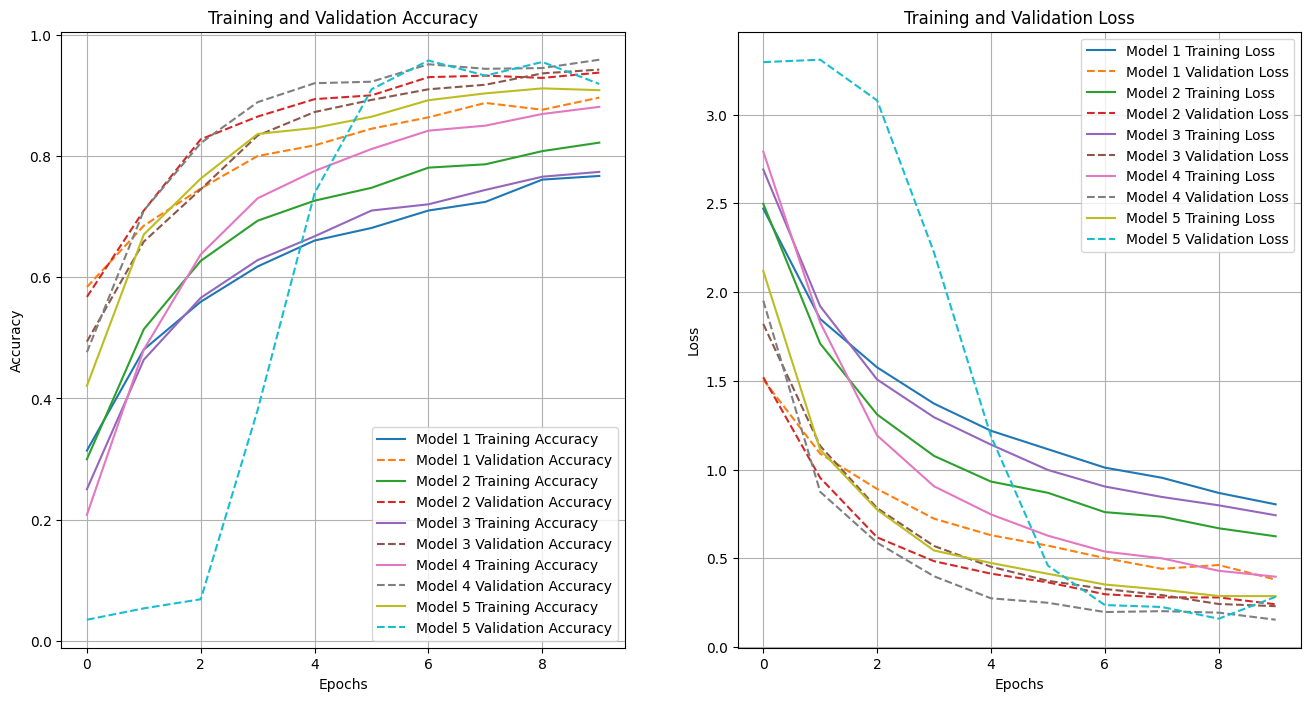

In [43]:
# Lấy accuracy và loss từ history của từng mô hình
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

acc4 = history4.history['accuracy']
val_acc4 = history4.history['val_accuracy']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

acc5 = history5.history['accuracy']
val_acc5 = history5.history['val_accuracy']
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']

# Tạo biểu đồ
epochs_range = range(EPOCHS_COUNT)

plt.figure(figsize=(16, 8))

# Biểu đồ Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc1, label='Model 1 Training Accuracy', linestyle='-')
plt.plot(epochs_range, val_acc1, label='Model 1 Validation Accuracy', linestyle='--')

plt.plot(epochs_range, acc2, label='Model 2 Training Accuracy', linestyle='-')
plt.plot(epochs_range, val_acc2, label='Model 2 Validation Accuracy', linestyle='--')

plt.plot(epochs_range, acc3, label='Model 3 Training Accuracy', linestyle='-')
plt.plot(epochs_range, val_acc3, label='Model 3 Validation Accuracy', linestyle='--')

plt.plot(epochs_range, acc4, label='Model 4 Training Accuracy', linestyle='-')
plt.plot(epochs_range, val_acc4, label='Model 4 Validation Accuracy', linestyle='--')

plt.plot(epochs_range, acc5, label='Model 5 Training Accuracy', linestyle='-')
plt.plot(epochs_range, val_acc5, label='Model 5 Validation Accuracy', linestyle='--')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)

# Biểu đồ Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss1, label='Model 1 Training Loss', linestyle='-')
plt.plot(epochs_range, val_loss1, label='Model 1 Validation Loss', linestyle='--')

plt.plot(epochs_range, loss2, label='Model 2 Training Loss', linestyle='-')
plt.plot(epochs_range, val_loss2, label='Model 2 Validation Loss', linestyle='--')

plt.plot(epochs_range, loss3, label='Model 3 Training Loss', linestyle='-')
plt.plot(epochs_range, val_loss3, label='Model 3 Validation Loss', linestyle='--')

plt.plot(epochs_range, loss4, label='Model 4 Training Loss', linestyle='-')
plt.plot(epochs_range, val_loss4, label='Model 4 Validation Loss', linestyle='--')

plt.plot(epochs_range, loss5, label='Model 5 Training Loss', linestyle='-')
plt.plot(epochs_range, val_loss5, label='Model 5 Validation Loss', linestyle='--')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)

plt.show()


In [44]:
test_loss, test_acc = model1.evaluate(test_x, test_y)
print("Model1")
print(f'Test accuracy: {test_acc:.3f}')
print(f'Test loss: {test_loss:.3f}')
test_loss, test_acc = model2.evaluate(test_x, test_y)
print("Model2")
print(f'Test accuracy: {test_acc:.3f}')
print(f'Test loss: {test_loss:.3f}')
test_loss, test_acc = model3.evaluate(test_x, test_y)
print("Model3")
print(f'Test accuracy: {test_acc:.3f}')
print(f'Test loss: {test_loss:.3f}')
test_loss, test_acc = model4.evaluate(test_x, test_y)
print("Model4")
print(f'Test accuracy: {test_acc:.3f}')
print(f'Test loss: {test_loss:.3f}')
test_loss, test_acc = model5.evaluate(test_x, test_y)
print("Model5")
print(f'Test accuracy: {test_acc:.3f}')
print(f'Test loss: {test_loss:.3f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8598 - loss: 0.4487  
Model1
Test accuracy: 0.855
Test loss: 0.440
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9509 - loss: 0.1781  
Model2
Test accuracy: 0.955
Test loss: 0.179
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9599 - loss: 0.2022  
Model3
Test accuracy: 0.960
Test loss: 0.201
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9541 - loss: 0.1615
Model4
Test accuracy: 0.950
Test loss: 0.176
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8995 - loss: 0.3472
Model5
Test accuracy: 0.915
Test loss: 0.313


In [45]:
filename = "./Data/test/b_test.png"

In [46]:
from PIL import Image
image_ = Image.open(filename)
image_ = np.array(image_.convert("L").resize((28, 28))).astype(np.float32).reshape(28, 28, 1)/255

In [47]:
x_ = np.array([image_])

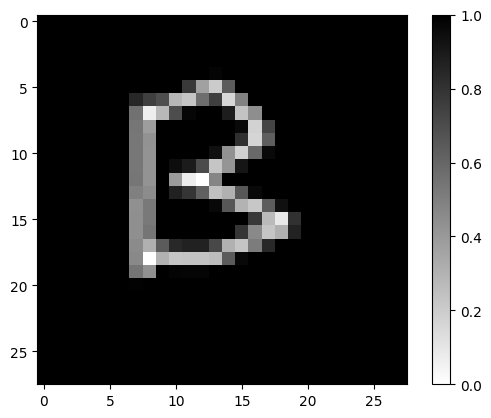

In [48]:
# Take 1 image and reshaping
image = x_
image = image.reshape(28, 28)

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [49]:
predict = model4.predict(x_)
predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


array([[0.001, 0.985, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.012, 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]],
      dtype=float32)

In [50]:
predict = model5.predict(x_)
label = np.argmax(predict,axis = 1)
encode[label[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


'B'

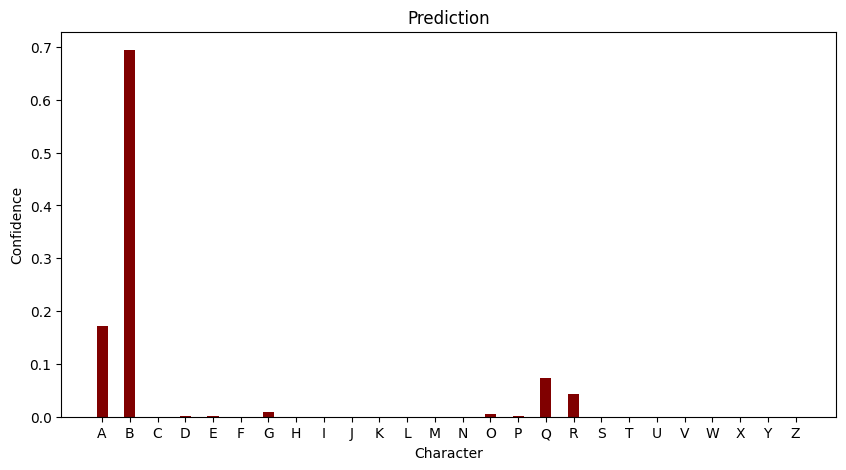

In [51]:
# Visualize the predict result
x = list(encode.values())
y = list(predict.flatten())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)

plt.xlabel("Character")
plt.ylabel("Confidence")
plt.title("Prediction")
plt.show()

In [52]:
from tensorflow.keras.models import Sequential

In [53]:
def create_model(optimizer='adam'):
    model = Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(26, activation="softmax")
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']}
from sklearn.model_selection import GridSearchCV

results = []

for optimizer in param_grid['optimizer']:
    print(f'optimizer : {optimizer}')
    model = create_model(optimizer=optimizer)
    history = model.fit(train_x, train_y, epochs=10, batch_size=10, validation_data=(val_x, val_y))
    results.append((optimizer, history))
best_accuracy = 0
best_optimizer = None

for optimizer, history in results:
    accuracy = history.history['val_accuracy'][-1]
    print(f"Optimizer: {optimizer}, Validation Accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_optimizer = optimizer

print(f"Best Optimizer: {best_optimizer}, Best Validation Accuracy: {best_accuracy}")


optimizer : SGD
Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.5531 - loss: 1.6435 - val_accuracy: 0.6637 - val_loss: 1.3200
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.8742 - loss: 0.4058 - val_accuracy: 0.8737 - val_loss: 0.3919
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9258 - loss: 0.2552 - val_accuracy: 0.9438 - val_loss: 0.2215
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9434 - loss: 0.1768 - val_accuracy: 0.9475 - val_loss: 0.1971
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9582 - loss: 0.1343 - val_accuracy: 0.9588 - val_loss: 0.1677
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9692 - loss: 0.1037 - val_accuracy: 0.9663 - val_loss: 0.1558
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9781 - loss: 0.0687 - val_accuracy: 0.9513 - val_loss: 0.1945
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9704 - loss: 

In [135]:
def create_model(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-07):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon,name='Adamax')
    model = Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(26, activation="softmax")
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [143]:
# Tạo danh sách các giá trị tham số từ param_grid
learning_rates = [0.0001, 0.0005]
beta_1_values = [0.8, 0.9]
beta_2_values = [0.99, 0.999]
epsilons = [1e-07]

results_ = []
total_configs = len(learning_rates) * len(beta_1_values) * len(beta_2_values) * len(epsilons)
config_count = 0

In [144]:
for learning_rate in learning_rates:
    for beta_1 in beta_1_values:
        for beta_2 in beta_2_values:
            for epsilon in epsilons:
                config_count += 1
                print(f"Processing configuration {config_count}/{total_configs}...")

                model = create_model(learning_rate,beta_1,beta_2,epsilon)
                history_ = model.fit(train_x, train_y, epochs=10, batch_size=10, validation_data=(val_x, val_y))
                param = {
                        'learning_rate': learning_rate,
                        'beta_1': beta_1,
                        'beta_2': beta_2,
                        'epsilon': epsilon
                    }
                results_.append((history_,param))


Processing configuration 1/8...
Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 34s 49ms/step - accuracy: 0.3952 - loss: 2.3282 - val_accuracy: 0.3787 - val_loss: 2.6673
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.7887 - loss: 0.7310 - val_accuracy: 0.8600 - val_loss: 0.5154
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.8887 - loss: 0.3749 - val_accuracy: 0.8925 - val_loss: 0.3618
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 29s 72ms/step - accuracy: 0.9357 - loss: 0.2341 - val_accuracy: 0.9187 - val_loss: 0.2842
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.9424 - loss: 0.1940 - val_accuracy: 0.9425 - val_loss: 0.2303
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.9528 - loss: 0.1391 - val_accuracy: 0.9350 - val_loss: 0.2327
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.9729 - loss: 0.0994 - val_accuracy: 0.9438 - val_loss: 0.2128
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - ac

In [146]:
best_score = -np.inf
best_params = {}
for history,param in results_:
    accuracy = history.history['val_accuracy'][-1]
    print(f"Params = {param} : {accuracy}")
    if accuracy > best_score:
        best_score = accuracy
        best_params = param
# In ra tham số tốt nhất và điểm số tương ứng
print("Best parameters:", best_params)
print("Best score:", best_score)

Params = {'learning_rate': 0.0001, 'beta_1': 0.8, 'beta_2': 0.99, 'epsilon': 1e-07} : 0.9462500214576721
Params = {'learning_rate': 0.0001, 'beta_1': 0.8, 'beta_2': 0.999, 'epsilon': 1e-07} : 0.9549999833106995
Params = {'learning_rate': 0.0001, 'beta_1': 0.9, 'beta_2': 0.99, 'epsilon': 1e-07} : 0.949999988079071
Params = {'learning_rate': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07} : 0.9537500143051147
Params = {'learning_rate': 0.0005, 'beta_1': 0.8, 'beta_2': 0.99, 'epsilon': 1e-07} : 0.9337499737739563
Params = {'learning_rate': 0.0005, 'beta_1': 0.8, 'beta_2': 0.999, 'epsilon': 1e-07} : 0.9262499809265137
Params = {'learning_rate': 0.0005, 'beta_1': 0.9, 'beta_2': 0.99, 'epsilon': 1e-07} : 0.949999988079071
Params = {'learning_rate': 0.0005, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07} : 0.956250011920929
Best parameters: {'learning_rate': 0.0005, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07}
Best score: 0.956250011920929
